## CHALLENGE: CREATE A MODEL IN 2 HOURS 


El proyecto tiene cuatro componentes, los cuales son:

1. Análisis exploratorio de datos.
2. Construcción de un modelo analítico (Prototipado rápido).
3. Evaluación del modelo y pasos a seguir.
4. Conclusiones


## Entendimiento de los datos

En la prueba vas a trabajar con el conjunto de datos Churn-Modeling descargado de Kaggle. Este conjunto de datos contiene detalles de los clientes de un banco y la variable objetivo es una variable binaria que refleja el hecho de si el cliente dejó el banco (cerró su cuenta) o si continúa siendo un cliente. 

Las características capturan información sociodemográfica del cliente, información de productos financieros, el comportamiento y balance de su cuenta. Las características son las siguientes:

* **CustomerId**: Id único para identificar el cliente.
* **Surname**: Apellido del cliente.
* **CreditScore**: Puntaje de crédito del cliente.
* **Geography**: País al que pertenece el cliente.
* **Gender**: Genero.
* **Age**: Edad.
* **Tenure**: Número de años que el cliente ha estado en el banco.
* **Balance**: Saldo bancario del cliente.
* **NumOfProducts**: Número de productos bancarios que utiliza el cliente.
* **HasCrCard**: Si el cliente tiene tarjeta de crédito con el banco.
* **IsActiveMember**: Si el cliente es miembro activo del banco o no.
* **EstimatedSalary**: Salario estimado en dólares.
* **Exited**: 1-Si el cliente cerró la cuenta con el banco; 0-Si el cliente es retenido. 



## Carga de datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# pd.options.display.float_format = '{:,.1f}'.format

In [2]:
df = pd.read_csv('Data/churn-modeling.csv')

In [3]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,No,No,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        9980 non-null   object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  object 
 10  IsActiveMember   10000 non-null  object 
 11  EstimatedSalary  9988 non-null   float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 1015.8+ KB


## Drop irrelevant variables

In [5]:
cols_to_drop = ['CustomerId', 'Surname']

In [6]:
df.drop(columns=cols_to_drop, inplace=True, axis=1)

In [7]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,0
2,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,1
3,699,France,Female,39,1,0.00,2,No,No,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,0


In [8]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9988.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100066.908601,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57519.993379,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,50910.677500,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100185.240000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000,1.000000


## Look for empty rows

In [9]:
df.duplicated().sum()

0

## Convert to categorical variables

In [10]:
df['Geography']=df['Geography'].astype('category')
df['Gender']=df['Gender'].astype('category')
df['IsActiveMember']=df['IsActiveMember'].astype('category')
df['Exited']=df['Exited'].astype('category')
df['HasCrCard']=df['HasCrCard'].astype('category')


## 1. Análisis exploratorio de datos

El análisis exploratorio de datos (EDA) es un paso previo a la hora de comprender los datos con los que se va a trabajar. El objetivo de este análisis es explorar, describir, resumir y visualizar la naturaleza de los datos recogidos en las variables aleatorias de interés, mediante la aplicación de técnicas simples de resumen de datos y métodos gráficos.

Realice el análisis exploratorio e indique los hallazgos o conclusiones al final de esta sección.

In [11]:
cols = df.columns
# Let´s check weight values in each variable.  
for i in cols:
    print('___________________', i, '___________________')
    unique = df[i].value_counts()/df[i].count()*100
    print(unique) 

___________________ CreditScore ___________________
850    2.33
678    0.63
655    0.54
705    0.53
667    0.53
       ... 
419    0.01
417    0.01
373    0.01
365    0.01
401    0.01
Name: CreditScore, Length: 460, dtype: float64
___________________ Geography ___________________
France     50.180361
Germany    25.080160
Spain      24.739479
Name: Geography, dtype: float64
___________________ Gender ___________________
Male      54.57
Female    45.43
Name: Gender, dtype: float64
___________________ Age ___________________
37    4.78
38    4.77
35    4.74
36    4.56
34    4.47
      ... 
92    0.02
88    0.01
82    0.01
85    0.01
83    0.01
Name: Age, Length: 70, dtype: float64
___________________ Tenure ___________________
2     10.48
1     10.35
7     10.28
8     10.25
5     10.12
3     10.09
4      9.89
9      9.84
6      9.67
10     4.90
0      4.13
Name: Tenure, dtype: float64
___________________ Balance ___________________
0.00         36.17
105473.74     0.02
130170.82     0.02


In [12]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,0


In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,0
2,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,1
3,699,France,Female,39,1,0.00,2,No,No,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,0


Text(0, 0.5, 'Exited')

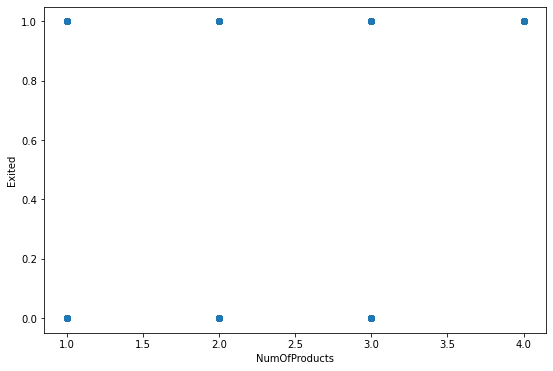

In [14]:
fig, ax = plt.subplots(figsize=(9, 6))

plt.scatter(df['NumOfProducts'], df['Exited'])
plt.xlabel('NumOfProducts')
plt.ylabel('Exited')

array([[<AxesSubplot:title={'center':'CreditScore'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Tenure'}>,
        <AxesSubplot:title={'center':'Balance'}>],
       [<AxesSubplot:title={'center':'NumOfProducts'}>,
        <AxesSubplot:title={'center':'EstimatedSalary'}>]], dtype=object)

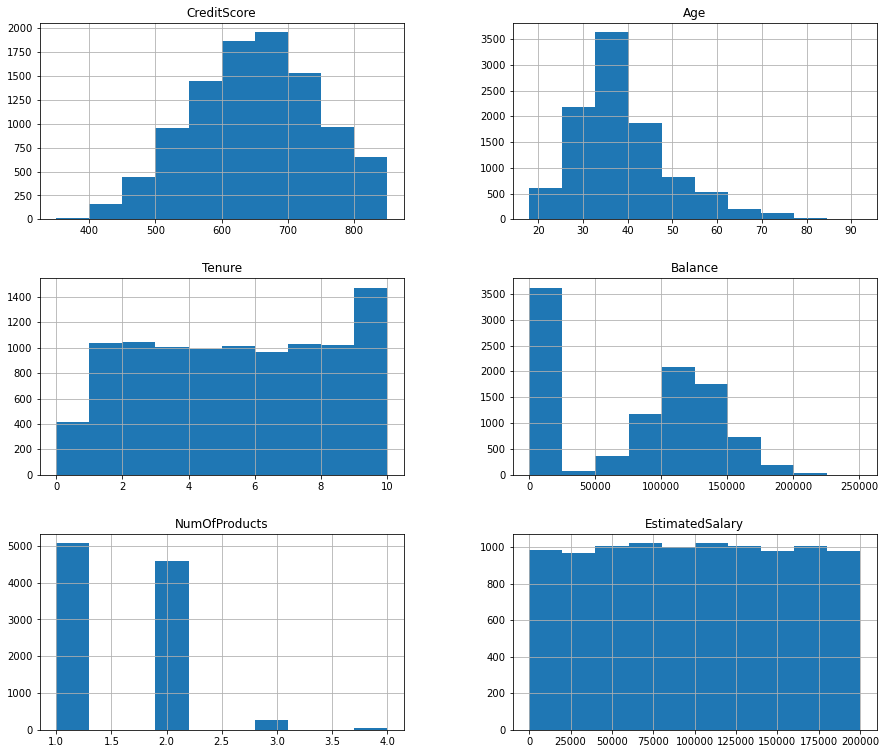

In [15]:
df.hist(figsize=(15,13))

In [16]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

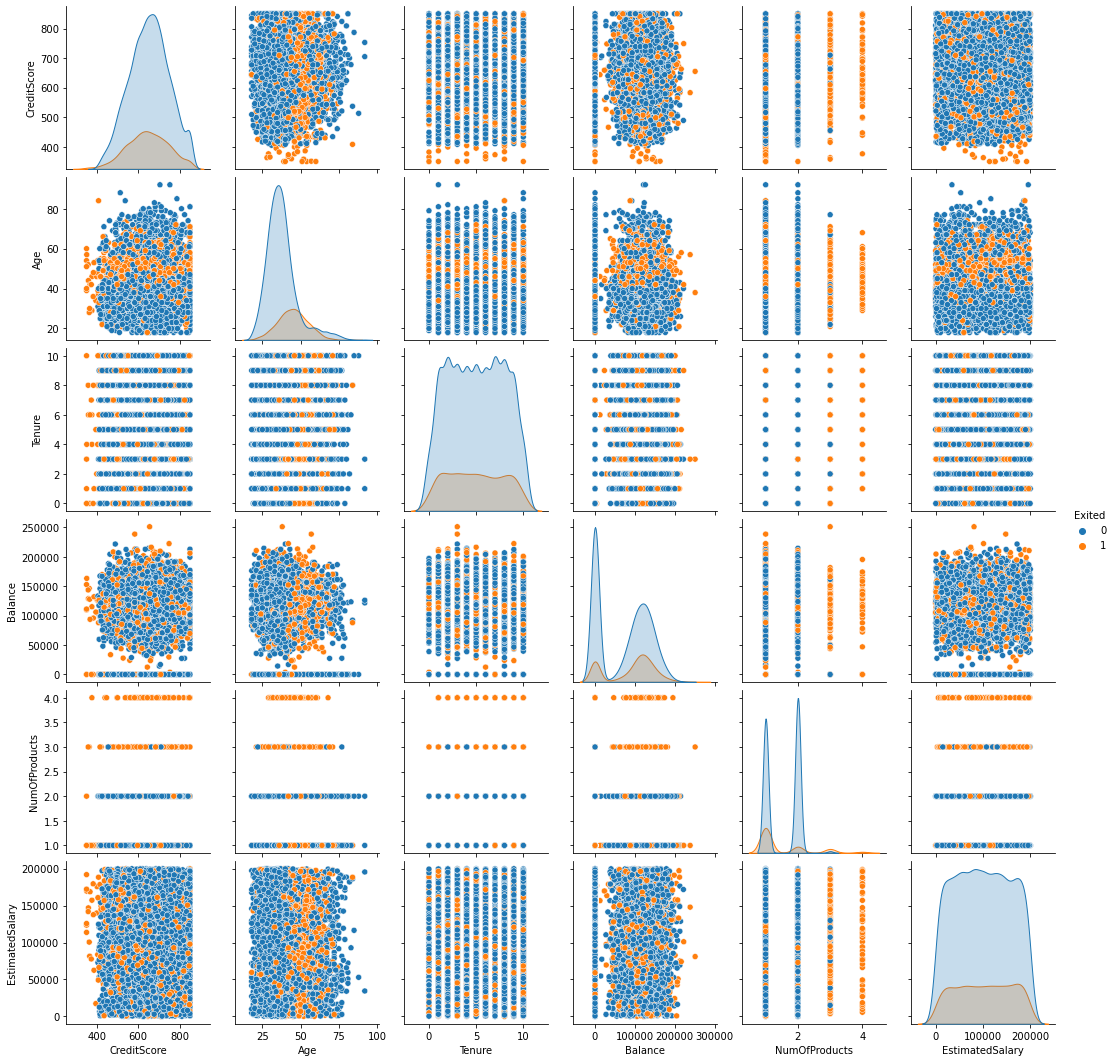

In [17]:
sns.pairplot(df, hue = "Exited", vars = ['CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'EstimatedSalary'])

### insights

 When people has 3, 4 or more products has more tendency to close the account <br>
When people are near to 50s has more tendendy to close the account


In [18]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,0


In [19]:
df.corr()
df_corr = df.corr()

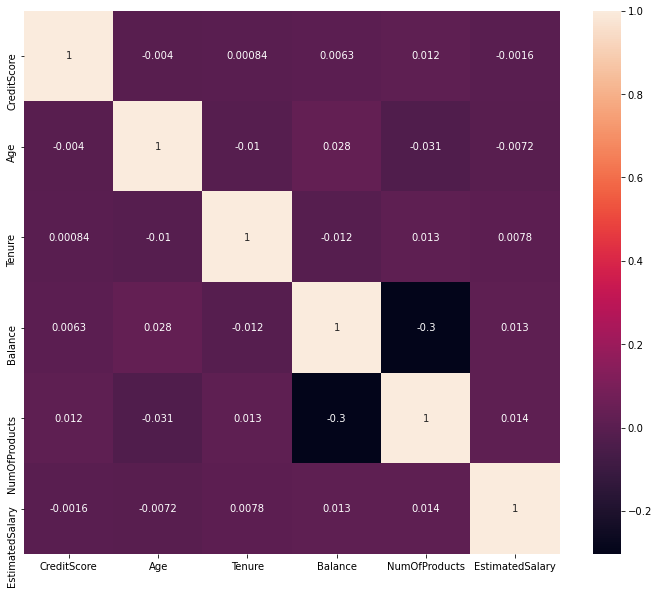

In [20]:
fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(df_corr, annot=True);

## Data Cleaning

### Ouliers

In [21]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9988.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100066.908601
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57519.993379
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,50910.677500
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100185.240000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


<AxesSubplot:>

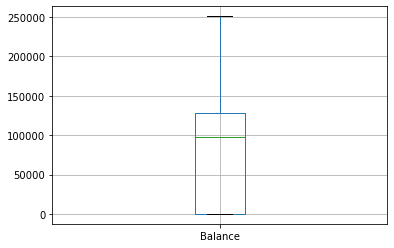

In [22]:
df.boxplot('Balance')

<AxesSubplot:>

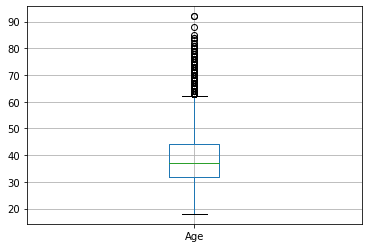

In [23]:
df.boxplot('Age')

There are not outilers in the variables (values that are not common or outside of reality of the DS)

In [24]:
df.isna().sum()/len(df)*100

CreditScore        0.00
Geography          0.20
Gender             0.00
Age                0.00
Tenure             0.00
Balance            0.00
NumOfProducts      0.00
HasCrCard          0.00
IsActiveMember     0.00
EstimatedSalary    0.12
Exited             0.00
dtype: float64

there are few na values, let´s drop them

In [25]:
# df.dropna(how='all', inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        9980 non-null   category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  category
 8   IsActiveMember   10000 non-null  category
 9   EstimatedSalary  9988 non-null   float64 
 10  Exited           10000 non-null  category
dtypes: category(5), float64(2), int64(4)
memory usage: 518.2 KB


<AxesSubplot:title={'center':'Percentage of Missing Values per column'}>

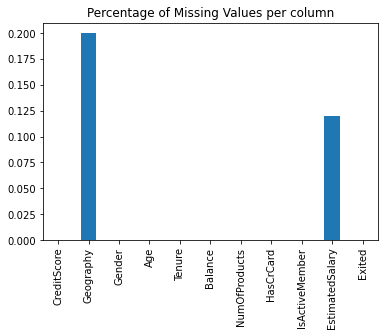

In [26]:
df.info()
(df.isna().sum()/len(df)*100).plot.bar(title = 'Percentage of Missing Values per column')

In [27]:
df['EstimatedSalary'].fillna(df['EstimatedSalary'].mean(), inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        9980 non-null   category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  category
 8   IsActiveMember   10000 non-null  category
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  category
dtypes: category(5), float64(2), int64(4)
memory usage: 518.2 KB


In [29]:
df.dropna(how='any', inplace=True)
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<AxesSubplot:title={'center':'Percentage of Missing Values per column'}>

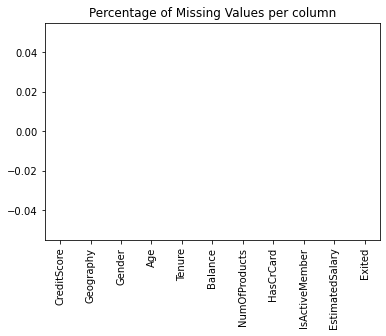

In [30]:
(df.isna().sum()/len(df)*100).plot.bar(title = 'Percentage of Missing Values per column')

In [31]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9980 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      9980 non-null   int64   
 1   Geography        9980 non-null   category
 2   Gender           9980 non-null   category
 3   Age              9980 non-null   int64   
 4   Tenure           9980 non-null   int64   
 5   Balance          9980 non-null   float64 
 6   NumOfProducts    9980 non-null   int64   
 7   HasCrCard        9980 non-null   category
 8   IsActiveMember   9980 non-null   category
 9   EstimatedSalary  9980 non-null   float64 
 10  Exited           9980 non-null   category
dtypes: category(5), float64(2), int64(4)
memory usage: 595.0 KB


### Insights

I´ve decided to fill with mean the salary because is a value that doesn´t has big dispersion
and I´ve deleted the Geography nan rows, because are only de 0.2% and has only 3 countries to determinate that France is the country in which the people belongs to

## Balanced target variable

<AxesSubplot:>

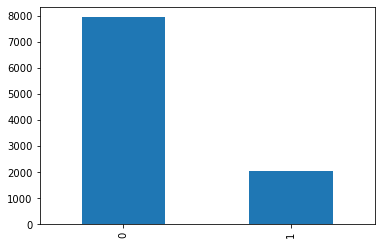

In [32]:
df['Exited'].value_counts().plot(kind='bar')

## Train Test Split

In [33]:
from sklearn.model_selection import train_test_split

X = df.drop('Exited', axis=1)
Y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Even it appear to be unbalanced, I decided to work with this  20% of Exited=1

In [34]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,0
2,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,1
3,699,France,Female,39,1,0.00,2,No,No,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,0


In [35]:
df.shape

(9980, 11)

## Transformation of variables with a pipeline


Create a pipeline to transform numeric and categorical variables

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('poly', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
#     ('cross', PolynomialFeatures(interaction_only=True))
])

In [37]:
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns

from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

The model selected (next code lines) was a LGBMClassifier() because it gives us best results on metrics. 

Each week could be read by this model the new .csv, but making some other piplines.

If the company want to use it in the cloud, could upload in some cloud with ML services creating the .pkl file

The metrics of the model need to be measured each time (depends on the kind of the model) for example for this could be each 6 months, but if the variables change drasctically needs to be trained again.



In [40]:
from sklearn.metrics import accuracy_score, log_loss, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
    LGBMClassifier()
    ]
for classifier in classifiers:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', classifier)])
    pipe.fit(X_train, y_train)   
    y_pred = pipe.predict(X_test)
    print(classifier)
    print("model score: %.3f" % pipe.score(X_test, y_test))
    print("model f1 score: %.3f" % f1_score(y_test, y_pred))

KNeighborsClassifier(n_neighbors=3)
model score: 0.839
model f1 score: 0.519
SVC(C=0.025, probability=True)
model score: 0.806
model f1 score: 0.005
DecisionTreeClassifier()
model score: 0.800
model f1 score: 0.503
RandomForestClassifier()
model score: 0.860
model f1 score: 0.563
AdaBoostClassifier()
model score: 0.855
model f1 score: 0.559
GradientBoostingClassifier()
model score: 0.867
model f1 score: 0.584


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:45:56] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
model score: 0.862
model f1 score: 0.578
LGBMClassifier()
model score: 0.864
model f1 score: 0.586


In [ ]:
pipe.steps[1][1].feature_importances_

## Select LGBMClassifier() model - hypertunnig

In [41]:
LGBMC = LGBMClassifier()

In [42]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

In [43]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

gs = RandomizedSearchCV(
    estimator=LGBMC, param_distributions=param_test, 
    n_iter=50,
    scoring='roc_auc',
    cv=3,
    refit=True,
    random_state=314,
    verbose=True)

In [44]:
gs.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=LGBMClassifier(), n_iter=50,
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f4cccdd00f0>,
                                        'min_child_samples': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f4cccd17860>,
                                        'min_child_weight': [1e-05, 0.001, 0.01,
                                                             0.1, 1, 10.0,
                                                             100.0, 1000.0,
                                                             10000.0],
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f4cd0707a20>,
                                        'reg_alpha': [0, 0.1, 1, 2, 5, 7, 10,
                                                      50, 100],
                                        'reg_lambda': [0, 0.1, 1, 5, 10, 20, 50,
                   

In [45]:
y_predict_optimized = gs.predict(X_test)


### Score of the model

In [46]:
print("model f1 score: %.3f" % f1_score(y_test, y_predict_optimized))

model f1 score: 0.580


### classification report

In [48]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(y_test, y_predict_optimized))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1608
           1       0.72      0.48      0.58       388

    accuracy                           0.86      1996
   macro avg       0.80      0.72      0.75      1996
weighted avg       0.85      0.86      0.85      1996



# Conclusiones

First of all to improve the metrics, we need to do the simple actions, feature engineering, maybe work on this variables and ask for more information to the bank. Create new varaibles too.

When people has 3, 4 or more products has more tendency to close the account

When people are near to 50s has more tendendy to close the account

The Bank need to establish some strategies to impact people near to 50s ages and try to do an a survey and figure out this cause

For improving the model it is necesary to manage each parameter of the model

I used the metric f1_score to decide which model was selected



